# Mean-shift Clustering Technique

Mean-shift clustering aims to discover blobs in a smooth density of samples. It is a centroid based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.

Given a candidate centroid $x_i$ for iteration $t$, the candidate is updated according to the following equation:

$$x_i^{t+1} = x_i^t + m(x_i^t)$$

Where $N(x_i)$ is the neighborhood of samples within a given distance around $x_i$ and $m$ is the mean shift vector that is computed for each centroid that points towards a region of the maximum increase in the density of points. This is computed using the following equation, effectively updating a centroid to be the mean of the samples within its neighborhood:

$$m(x_i) = \frac{\sum_{x_j \in N(x_i)}K(x_j - x_i)x_j}{\sum_{x_j \in N(x_i)}K(x_j - x_i)}$$

**The algorithm automatically sets the number of clusters, instead of relying on a parameter bandwidth, which dictates the size of the region to search through**. This parameter can be set manually, but can be estimated using the provided `estimate_bandwidth` function, which is called if the bandwidth is not set.

**The algorithm is not highly scalable, as it requires multiple nearest neighbor searches** during the execution of the algorithm. The algorithm is guaranteed to converge, however the algorithm will stop iterating when the change in centroids is small.

## Make the synthetic data

In [8]:
import matplotlib.pyplot as plt

In [7]:
import numpy as np

In [4]:
from sklearn import metrics
from sklearn.cluster import MeanShift
from sklearn.datasets.samples_generator import make_blobs

In [22]:
import time

In [23]:
from tqdm import tqdm

In [6]:
%matplotlib inline

In [10]:
# Generate sample data
centers = [
    [1, 1],
    [-1, -1],
    [1, -1]
]
X, labels_true = make_blobs(n_samples=300,
                            centers=centers,
                            cluster_std=0.4,
                            random_state=101)

In [11]:
X.shape

(300, 2)

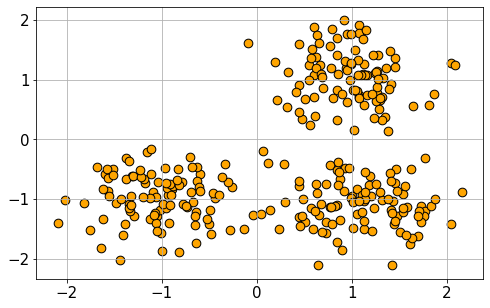

In [12]:
plt.figure(figsize=(8,5))
plt.scatter(X[:,0],X[:,1],edgecolors='k',c='orange',s=75)
plt.grid(True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## Clustering

In [13]:
ms_model = MeanShift().fit(X)
cluster_centers = ms_model.cluster_centers_
labels = ms_model.labels_
n_clusters = len(cluster_centers)
labels = ms_model.labels_

### Number of detected clusters and their centers

In [14]:
print("Number of clusters detected by the algorithm:", n_clusters)

Number of clusters detected by the algorithm: 3


In [15]:
print("Cluster centers detected at:\n\n", cluster_centers)

Cluster centers detected at:

 [[ 1.09954715 -1.09294823]
 [ 0.9931698   1.05074234]
 [-0.99420039 -0.96765319]]


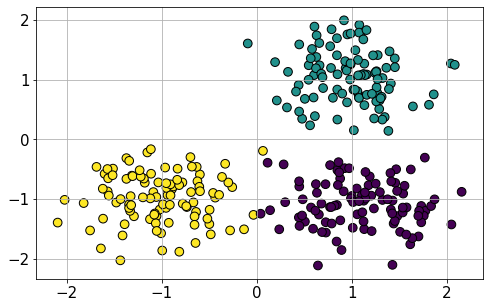

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(X[:,0],X[:,1],edgecolors='k',c=ms_model.labels_,s=75)
plt.grid(True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Homogeneity

Homogeneity metric of a cluster labeling given a ground truth.

A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class. This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

In [20]:
print(f"Homogeneity score: {metrics.homogeneity_score(labels_true,labels)}")

Homogeneity score: 0.9405073022327171


### Completeness

Completeness metric of a cluster labeling given a ground truth.

A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster. This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

In [21]:
print(f"Completeness score: {metrics.completeness_score(labels_true,labels)}")

Completeness score: 0.9405073022327171


## Time complexity and model quality as the data size grows

In [24]:
n_samples = [10,20,50,100,200,500,1000,2000,3000,5000,7500,10000]
centers = [[1, 1], [-1, -1], [1, -1]]
t_ms = []
homo_ms=[]
complete_ms=[]

for i in tqdm(n_samples):
    X,labels_true = make_blobs(n_samples=i, centers=centers, cluster_std=0.4,random_state=101)
    t1 = time.time()
    ms_model = MeanShift().fit(X)
    t2=time.time()
    t_ms.append(t2-t1)
    homo_ms.append(metrics.homogeneity_score(labels_true,ms_model.labels_))
    complete_ms.append(metrics.completeness_score(labels_true,ms_model.labels_))

100%|██████████| 12/12 [01:18<00:00,  6.56s/it]


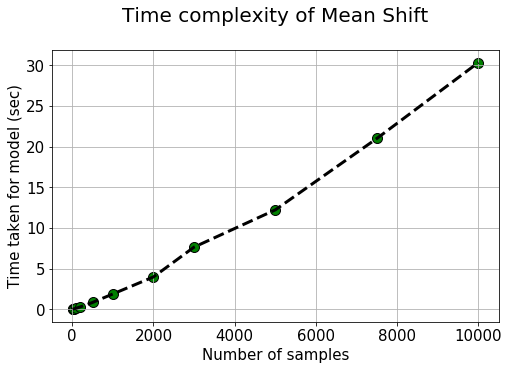

In [25]:
plt.figure(figsize=(8,5))
plt.title("Time complexity of Mean Shift\n",fontsize=20)
plt.scatter(n_samples,t_ms,edgecolors='k',c='green',s=100)
plt.plot(n_samples,t_ms,'k--',lw=3)
plt.grid(True)
plt.xticks(fontsize=15)
plt.xlabel("Number of samples",fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Time taken for model (sec)",fontsize=15)
plt.show()

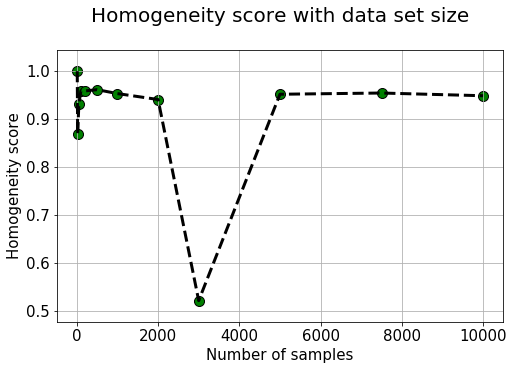

In [26]:
plt.figure(figsize=(8,5))
plt.title("Homogeneity score with data set size\n",fontsize=20)
plt.scatter(n_samples,homo_ms,edgecolors='k',c='green',s=100)
plt.plot(n_samples,homo_ms,'k--',lw=3)
plt.grid(True)
plt.xticks(fontsize=15)
plt.xlabel("Number of samples",fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Homogeneity score",fontsize=15)
plt.show()